In [1]:
# Import some libraries from python and set some defaults
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.image as mpimg
import sys
import os
import time
sys.path.append(os.getcwd())
# from scipy.interpolate import CubicSpline
import pickle
import copy
from DEq_Solver import DEq_Solver
plt.rcParams.update({'font.size': 17})
params = {'axes.labelsize': 16, 'axes.titlesize': 16}
plt.rcParams.update(params)
rc('animation', html='html5')

In [2]:
from ipywidgets import widgets, interact, interactive, fixed
from ipywidgets import Button, HBox, VBox
import shelve
assessmentName="test";
import os

def get_last_value(key):
    if os.path.isfile('.choices.shelve') or os.path.isfile('.choices.shelve.dir'):
        s=shelve.open('.choices.shelve')
        return s.get(key,None)
    return None


class myRadioButton:
    def __init__(self,name,description,options):
        self.name=name
        self.options=options
        self.description=description
    def getWidget(self):
        def on_value_change(change):
            s=shelve.open('.choices.shelve')
            key=self.getKey()
            s[key]=change['new']
            s.close()

        self.widget=widgets.RadioButtons(
            options=self.options,
            value=get_last_value(self.getKey()),
            description=self.description,
            disabled=False
        )
        self.widget.observe(on_value_change, names='value')

        return self.widget
    def getKey(self):
        return '{0}_{1}'.format(assessmentName,self.name)
        
        
def on_value_change(change):
                s=shelve.open('.choices.shelve')
                key='{0}_{1}_{2}'.format(assessmentName,self.name,i)
                s[key]=change['new']
                s.close()

def make_value_change_fn(assessmentName,name,i):
        def fn(change):
            s=shelve.open('.choices.shelve')
            key='{0}_{1}_{2}'.format(assessmentName,name,i)
            s[key]=change['new']
            s.close()
        return fn

class myCheckBoxSet:
    def __init__(self,name,description,options):
        self.name=name
        self.options=options
        self.description=description
    def getWidget(self):
        keys=['{0}_{1}_{2}'.format(assessmentName,self.name,i) for i in range(len(self.options))]    
        self.widgets=[ widgets.Checkbox(value=get_last_value(key),
    description=o,
    disabled=False
        ) for key,o in zip(keys,self.options)]
        
        txt=widgets.HTMLMath(
            value=self.description,
            placeholder='',
            description='',
        )

        
        self.widget=VBox([txt]+self.widgets)
        for i,w in enumerate(self.widgets):
            w.observe(make_value_change_fn(assessmentName,self.name,i), names='value')

        return self.widget

# Preamble: workshop notebooks

Work through this notebook cell by cell.

When working on your solution, you can save the notebook as many times as you like. You can also submit 
as many times as you like. In fact, it is a good idea to save and submit often.

**Validate** the notebook before submitting. Use the *validate* button in the browser

**Do not copy or delete one of the original cells**. Doing so means you cannot validate the notebook.
If required, *create a new cell*, and copy the *contents* of another cell.


**Only the last submission before the deadline** will be marked.
Note that you have to **submit** at least once for your work to be marked.





The notebook contains cells with code. Some of the code is (intentionally) missing. Please insert appropriate code below the line 'YOUR CODE HERE'. Cells which do not contain any 'YOUR CODE HERE' lines will allow you to test your code; if they return an error there is something wrong with your implementation; if they do not return an error your code might be correct (it is unfortunately not possible to check for every possible error).

Note:
  - simply add numerical value in a dropbox for it to get marked
  
  - when asked for true/false in a box: 
      - ticking a box means True
      - not ticking (or ticking an even number of times) yields False 



# Workshop I: Radioactive decay

In this exercise we will solve numerically the equation for radioactive decay of isotope A to isotope B and compare the numerical result to its analytical counterpart. We will use Euler's method.

As a second step we will generalize the solver to deal with three elements, where isotope A decays to isotope B and isotope B decays to isotope C. 

Total marks for this assignment is 10.

Note:
  - simply add numerical value in a dropbox for it to get marked
  
  - when asked for true/false in a box: 
      - ticking a box means True
      - not ticking (or ticking an even number of times) yields False 



## Euler's method

Euler's method for solving the first order DE


$\frac{{\rm d}x}{{\rm d}t} = f(x,t)$

is

$x^{n+1} = x^{n} + f(x^n,t^n)\,\Delta t$.

We begin by implementing a routine, ``makeStep``, that implements this time integration, and test it in the special case where
$f(x,t)$ is a constant.



This is where we define the Euler solver. The class Euler Solver below is derived from the more general DEq_Solver class (see DEq_Solver.py in the same directory). This means that the resulting EulerSolver class features all the methods defined in DEq_Solver as well as the additional EulerSolver methods which you are supposed to complete below. 

Implement the makeStep(self) function. Within this function you have access to 

- the current coordinates array as ``self.x``
- the current time as ``self.t``
- the derivative $dx/dt$ as ``self.kernel.dx_dt(self.x,self.t)``
- the timestep as ``self.delta_t``

the function ``makeStep`` has to update ``self.x`` and ``self.t``.
 
**3 marks** 

In [7]:
class EulerSolver(DEq_Solver):
    def __init__(self,kernel):
        self.kernel  = kernel
    def makeStep(self):
        ### update the position self.x, given dx_dt=self.kernel.dx_dt(self.x, self.t) and the timestep, self.delta_t
        ### and the timestep       
        self.x += 0.0
        # YOUR CODE HERE
        self.x=self.kernel.dx_dt(self.x,self.t)*(self.delta_t)+self.x
        self.t += self.delta_t        

These two cells test your implementation of the ``makeStep`` routine.

In [8]:
class ConstantSpeedKernel:
    def dx_dt(x,t):
        return 2.3
d=EulerSolver(ConstantSpeedKernel)
x0=np.array([0.0])
t0=0
t1=10
delta_t=0.1
d.initialise(x0,t0,t1,delta_t)

# test 20 steps
for i in range(20):
    d.makeStep()
assert np.isclose(d.x,np.array([ 4.6]))

In [9]:
class testKernel:
    def dx_dt(x,t):
        return sum(x)*np.ones_like(x)
    
d=EulerSolver(testKernel)
x0=np.array([1.0,2.0,3.0])
t0=0
t1=10
delta_t=0.1
d.initialise(x0,t0,t1,delta_t)

for i in range(10):
    d.makeStep()

assert np.isclose(d.x,np.array([ 26.57169837,  27.57169837,  28.57169837])).all()

## Radioactive decay

We use the ``EulerSolver`` routine to calculate the radioactive decay of isotope A. 
The mathematical model describing the radioactive decay of A to B is 

$$  \frac{{\rm d}N_A}{{\rm d}t} = -\frac{N_A}{\tau} $$

We will use the solver above but we now need to provide the kernel for this 
specific case -- that is we have to provide the function $f$ in the "canonical form"

$$  \frac{{\rm d}x_i}{{\rm d}t} = f_i(x_i,t)$$


that is used in the lecture for describing differential equations of order one and their solution. To this end, the method

   ``dx_dt(self,x,t)``

 needs to be modified. 
 
In this case we know the analytical solution so we can compare our numerical result with the analytical formula that you need to implement in ``analytical``

In addition, in the ``__init__`` routine the half-life given by `hlife` needs to be converted into the time constant `tau`. 

All other input, plotting of results, etc. is already implemented in the following cells.

**2 marks**

In [10]:
import math
class Radioactive:
    def __init__(self,hlife):
        self.tau = 0
        # set self.tau, given the half-life, hlife
        # YOUR CODE HERE
        self.tau=hlife/np.log(2)

    def dx_dt(self,x,t):
        # return dx/dt, given x, t, and tau
        # YOUR CODE HERE
        return -x/self.tau
        
    def analytical(self,x0,t):
        # return the analytical solution for decay, given x0, t, and tau
        # YOUR CODE HERE
        return x0*np.exp(-t/self.tau)

    def relative_error(self,test,t0,t1):
        res = []
        for t,x in test:
            if len(res)==0:
                x0 = x
            res.append( (t, x/self.analytical(x0,t-t0)-1) )
        return res

Use the cells below to test your implementation and to create some plots.

In [11]:
# this checks the tau implementation
r=Radioactive(0.9)
assert np.isclose(r.tau,1.2984255368)

In [12]:
# this checks the kernel implementation
r=Radioactive(0.9)
assert np.isclose(r.dx_dt(5000,1.0),-3850.8176697774734)

### Application

Provided your code has passed the tests, you can use it to compute and plot the decay of some elements

In [13]:
# Initial conditions
natoms = 10000   # Original number of elements at time t=t0
hlife  = 0.2     # Half-life of the element
t0     = 0.0     # Initial time
t1     = 1.0     # Final time of simulation
deltat = 0.01    # Size of timestep

In [14]:
radioactive = Radioactive(hlife)
deq_solver  = EulerSolver(radioactive)

# We will now compute the solution for three sizes of the timestep, deltat, delta/10, 5deltat

# first simulation
x0      = np.array([natoms],dtype='f')
result  = deq_solver.solve(x0,t0,t1,deltat)
ts, xs  = zip(*result)
errors  = radioactive.relative_error(result,t0,t1)
te, xe  = zip(*errors)
sim1    = {'t':ts, 'x':xs, 'err':xe}

# second simulationx0 
x0      = np.array([natoms],dtype='f')
result  = deq_solver.solve(x0,t0,t1,deltat/10)
ts, xs  = zip(*result)
errors  = radioactive.relative_error(result,t0,t1)
te, xe  = zip(*errors)
sim2    = {'t':ts, 'x':xs, 'err':xe}

# third simulation
x0      = np.array([natoms],dtype='f')
result  = deq_solver.solve(x0,t0,t1,5*deltat)
ts, xs  = zip(*result)
errors  = radioactive.relative_error(result,t0,t1)
te, xe  = zip(*errors)
sim3     = {'t':ts, 'x':xs, 'err':xe}

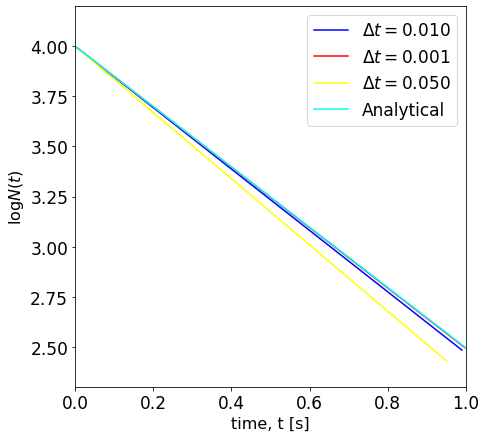

In [15]:
# single figure of size 7x7 cm
fig, ax  = plt.subplots(1, 1, figsize = (7, 7))

# plot first result
label = r"$\Delta t={0:1.3f}$".format(deltat)
ax.plot(sim1["t"], np.log10(sim1["x"]), label=label, color='blue')
        
# plot second result
label = r"$\Delta t={0:1.3f}$".format(deltat/10)
ax.plot(sim2["t"], np.log10(sim2["x"]), label=label, color='red')
        
# plot third result
label = r"$\Delta t={0:1.3f}$".format(5*deltat)
ax.plot(sim3["t"], np.log10(sim3["x"]), label=label, color='yellow')
        
# Analytical result
t  = np.arange(t0,t1,deltat/100)
x  = radioactive.analytical(natoms,t)
label = 'Analytical'
ax.plot(t, np.log10(x), label=label, color='cyan')


# generate legend
ax.legend()

# axis labels
ax.set_xlabel("time, t [s]")
ax.set_ylabel(r"$\log N(t)$")

# limits
ax.set_xlim([0,1])
ax.set_ylim([2.3,4.2])

# show figure
fig.show()

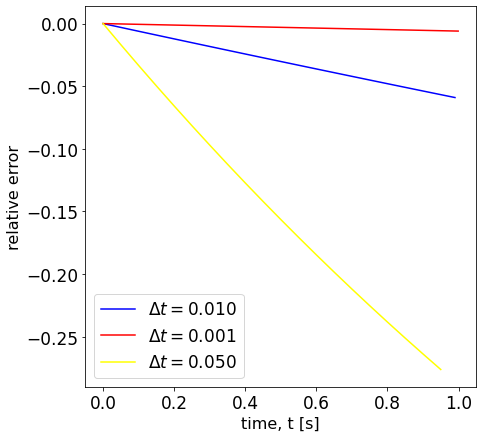

In [16]:
# plot the relative difference between numerical integration and analytical result

# single figure of size 7x7 cm
fig, ax  = plt.subplots(1, 1, figsize = (7, 7))

# plot first result
label = r"$\Delta t={0:1.3f}$".format(deltat)
ax.plot(sim1["t"], sim1["err"], label=label, color='blue')
        
# plot second result
label = r"$\Delta t={0:1.3f}$".format(deltat/10)
ax.plot(sim2["t"], sim2["err"], label=label, color='red')
        
# plot third result
label = r"$\Delta t={0:1.3f}$".format(5*deltat)
ax.plot(sim3["t"], sim3["err"], label=label, color='yellow')
        

# generate legend
ax.legend()

# axis labels
ax.set_xlabel("time, t [s]")
ax.set_ylabel(r"relative error")

# show figure
fig.show()



## Radioactive decay: three isotopes

Generalise the `Radioactive` class to a new class, `RadioactiveABC`, which is able treat a problem with three types of isotopes named A, B and C:

- A decays to B with half-life $h_A$
- B decays to C with half-life $h_B$ 

We start with 1000000 isotopes of type A, and none of types B nor C. 
There is no need to implement an analytical solution. You should be able to re-use ``EulerSolver`` (hint: ``self.x`` can be an array, for example containing $N_A$, $N_B$ and $N_C$).

You will have to add new empty cells below to implement your solution. Begin by creating a markdown cell with the equations you are intending to implement.

Create a plot of the abundances of istopes as a function of time. Execute this cell, and the two hidden cells below, in case the two multiple-choice questions are not visible. Use your code to help you answer the questions.


**5 marks**

The cell below is a start for implementing the solver. Some code is missing. Try to finish the implementation.

In [23]:
class RadioactiveABC:
    def __init__(self,hlifeA,hlifeB):
        self.tauA = hlifeA / np.log(2)
        self.tauB = hlifeB / np.log(2)


    def dx_dt(self,x,t):
        # return dx/dt as a numpy array, given
        # tauA, tauB and x
        # YOUR CODE HERE
        Na=-x[0]/self.tauA
        Nb=x[0]/self.tauA-x[1]/self.tauB
        Nc=x[1]/self.tauB
        return np.array([Na, Nb, Nc])


In [24]:
# run the simulations

hlifeAs=[0.7, 0.3]
hlifeBs=[0.9, 0.2]

Result = {}
for (hlifeA, hlifeB) in zip(hlifeAs, hlifeBs):
    rABC    = RadioactiveABC(hlifeA,hlifeB)
    solver  = EulerSolver(rABC)

    x0     = np.array([1000000,0,0],dtype='f')
    result = solver.solve(x0,0,5,0.01)

    na,nb,nc =solver.coordinateSteps()
    ts=solver.timeSteps()
    Result[hlifeA] = {}
    Result[hlifeA]["na"] = na
    Result[hlifeA]["nb"] = nb
    Result[hlifeA]["nc"] = nc
    Result[hlifeA]["ts"] = ts

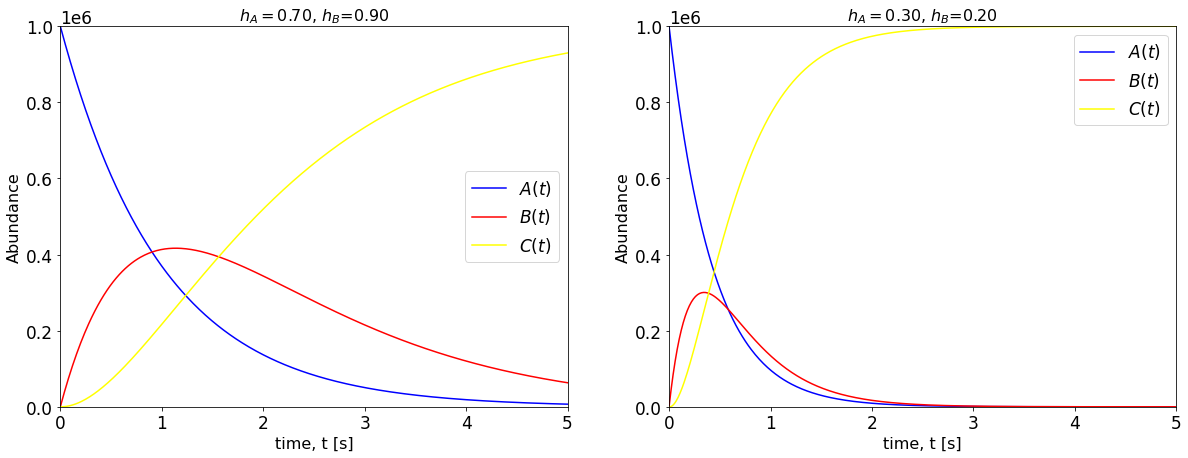

In [25]:
# plot the result

# single figure of size 7x7 cm
fig, ax  = plt.subplots(1, 2, figsize = (20, 7))

# evolution of A
panels = np.arange(2)
for (hlifeA, hlifeB, panel) in zip(hlifeAs, hlifeBs, panels):
    na = Result[hlifeA]["na"]
    nb = Result[hlifeA]["nb"]
    nc = Result[hlifeA]["nc"]
    ts = Result[hlifeA]["ts"]
    
    label = r"$A(t)$"
    ax[panel].plot(ts, na, label=label, color='blue')
        
    # evolution of B
    label = r"$B(t)$"
    ax[panel].plot(ts, nb, label=label, color='red')
        
    # evolution of C
    label = r"$C(t)$"
    ax[panel].plot(ts, nc, label=label, color='yellow')
        
    # generate legend
    ax[panel].legend()

    # axis labels
    ax[panel].set_xlabel("time, t [s]")
    ax[panel].set_ylabel(r"Abundance")

# limits
    ax[panel].set_xlim([0,5])
    ax[panel].set_ylim([0,1000000])

    title = r"$h_A=${0:1.2f}, $h_B$={1:1.2f}".format(hlifeA, hlifeB)
    ax[panel].set_title(title)

# show figure
fig.show()


In [3]:
mcbs1=myCheckBoxSet('radioactiveABC1','We consider $h_A=0.3$ and $h_B=0.2$. Which of the nuclei type has the most nuclei at time $t=1$ ?',[
    'type A',
    'type B',
    'type C']
)
mcbs1.getWidget()

In [4]:
mcbs2=myCheckBoxSet('radioactiveABC2',
                   'We consider $h_A=0.7$ and $h_B=0.9$. Which of the nuclei type number is increasing at time $t=0.5$?',[
    'type A',
    'type B',
    'type C']
)
mcbs2.getWidget()



## Playground

Below are some more exercises you may want to try. They are not graded

You may want to consider some of the following questions

*To answer the multi-choice questions, you may have run the simulation twice, to get the answer
for the two different values of the life-time of the elements. Try to redo the calculation
by making a *loop* over the input values. How can you best collect the output from such a loop?
Can you also make the plots in the loop.

*In the example given, we calculated the result in one cell, but pltted the outcome in another cell. Can you think of advantages (or disadvantages) of doing so?

•In the first example, the legend contained the results for the three simulations (with different timesteps), as well as the analytical result. The simulation results were distimjguished by colour, as was ythe analytcail result. It might be clearer if we had plotted the nalaytical result with symbol, say, and have two seperate legends: one for the simulations, and one for the nalaytiucal result. Can your try your hand at that?


This is suggestion for yet another exercise

The number of individuals in a population, $N$, changes because of births and deaths. Suppose this is described as


$\frac{{\rm d}N}{{\rm d}t} = a N - b N^2$

where $a=10$ and $b=0.01$. Starting from $N=100$, evaluate the evolution of $N$. First analyse the expected behaviour, for example, is there an equilibrium population number? And what is the time-scale fo reaching this equilibrium.




